In [111]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
import matplotlib.pyplot as plt


In [112]:
#ex2.1
# creating input vector and initial weights
x = torch.tensor([1.])
z = torch.tensor([1.])

In [113]:
# setting up the network
class Net_1(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        self.fc1.weight.data.normal_(0,0)
        #self.fc1.weight.data.fill_(0)

    def forward(self, x):
        z_hat = self.fc1(x)
        return z_hat

net = Net_1()

In [114]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses=[]
weights=[]


In [115]:
# training the net
steps = 80

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    net = net.float()

    z_hat = net(x)
    loss = loss_f(z_hat, z)
    losses.append(loss)
    loss.backward()
    optimizer.step()
    weights.append(deepcopy(net.fc1.weight))

In [116]:
z_hat1 = net(x)
z_hat1

tensor([0.9632], grad_fn=<AddBackward0>)

Text(0.5, 0, 'iterarion')

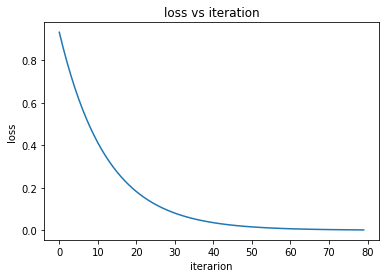

In [117]:
plt.plot(losses)
plt.title('loss vs iteration')
plt.ylabel('loss')
plt.xlabel('iterarion')

In [118]:
len(losses)
losses[79]

tensor(0.0015, grad_fn=<MseLossBackward0>)

In [119]:
len(weights)
type(weights[79])
norm=float(weights[79])
type(norm)
norm

0.4641243815422058

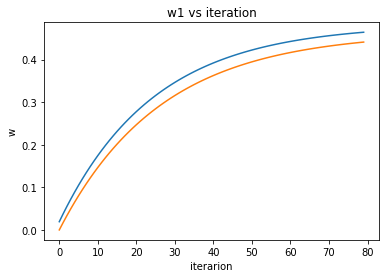

In [120]:
plt.plot(weights)
plt.title('w1 vs iteration')
plt.ylabel('w')
plt.xlabel('iterarion')
x_=np.linspace(0,3,80)

y=float(weights[79])*(1-np.exp(-x_))
#y=1-np.exp(-x_)

plt.plot(y)


In [121]:
#ex2.2
# creating input vector and initial weights

n0=100

x_vec = torch.randn(n0)
z = torch.tensor(1.0)



In [122]:
# setting up the network
class Net(nn.Module):

    def __init__(self, n0):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, 1)
        self.fc1.weight.data.normal_(1, 0.01)

    def forward(self, x):
        z_hat = self.fc1(x)
        return z_hat

net = Net(n0)

In [123]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses_2=[]

In [124]:
# training the net
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    losses_2.append(loss)
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [125]:
z_hat = net(x_vec)
z_hat

tensor([16.4567], grad_fn=<AddBackward0>)

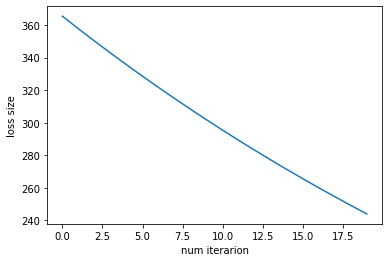

In [126]:
plt.plot(losses_2)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

In [127]:
#ex2.3
# creating input vector and initial weights
mu_x=0
sigma_x= 1
n0=100
n1=200

# x_vec = torch.from_numpy(np.random.normal(mu_x, sigma_x, n0))
x_vec = torch.randn(n0)
z = torch.tensor(1.)

In [128]:
# setting up the network
class Net(nn.Module):

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 0.01)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 0.05)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat


net = Net(n0, n1)
state_dict_init = deepcopy(net.state_dict())
w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()

print(net)

Net(
  (fc1): Linear(in_features=100, out_features=200, bias=False)
  (fc2): Linear(in_features=200, out_features=1, bias=False)
)


In [129]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses=[]



In [130]:
# training the net
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [131]:
z_hat = net(x_vec.float())
z_hat

tensor([1.], grad_fn=<SqueezeBackward3>)

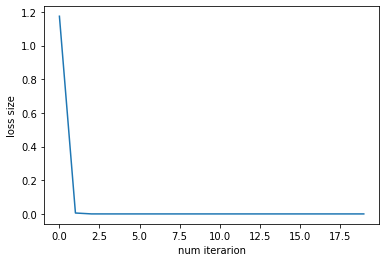

In [132]:
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

In [133]:
# Ex3
# w1- init w2-final
with torch.no_grad():
  w1_final=net.fc1.weight.clone()
  w2_final=net.fc2.weight.clone()

  net.fc1.weight[:] = w1_init
  z_hat_0 = net(x_vec)
  loss_0 = loss_f(z_hat_0, z)
  print(f"z_hat_0: {z_hat_0[0]:.3f}, loss_0: {loss_0:.3f}")


z_hat_0: -0.047, loss_0: 1.096


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [134]:
# w1- final w2-init
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:]=w2_init
  z_hat_0 = net(x_vec)
  loss_0 = loss_f(z_hat_0, z)
  print(f"z_hat_0: {z_hat_0[0]:.3f}, loss_0: {loss_0:.3f}")

z_hat_0: 0.970, loss_0: 0.001


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


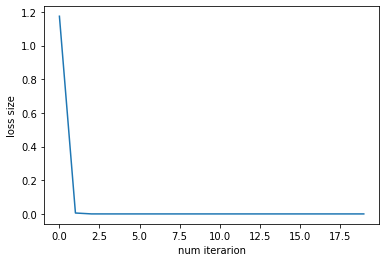

In [135]:
# freeze w1, train w2
with torch.no_grad():
    net.fc1.weight[:] = w1_init
# training the net
losses=[]
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

z_hat = net(x_vec)
z_hat
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


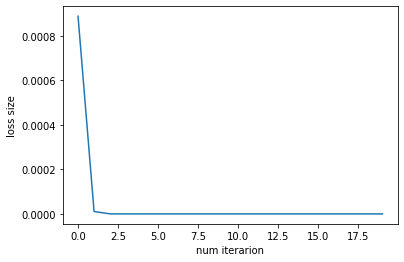

In [136]:
# freeze w2, train w1
with torch.no_grad():
    net.fc2.weight[:] = w2_init
# training the net
losses=[]
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

z_hat = net(x_vec)
z_hat
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()